### Breast Cancer Classification Analysis Report

1. Introduction and Objective

The primary objective of this analysis is to predict whether breast cancer is benign or malignant based on various features extracted from the data. This classification task is essential for medical decision-making, as early detection of malignant tumors can significantly increase survival rates. Our goal is to evaluate different machine learning models for this classification problem, compare their performance, and recommend the best model based on both accuracy and interpretability

### About Data
2. Data Description

The dataset used in this analysis is a breast cancer dataset that includes several features related to the physical characteristics of cell nuclei present in breast cancer biopsies. The target variable is the diagnosis, which can be either malignant (1) or benign (0). The dataset includes various attributes such as radius, texture, smoothness, and compactness of the nuclei. The data is clean, with a few preprocessing steps performed to drop irrelevant columns and encode the diagnosis into numerical values.

Key attributes include:

radius_mean: The mean of distances from the center to points on the perimeter.
texture_mean: Standard deviation of grayscale values.
perimeter_mean: Mean size of the perimeter.
area_mean: Mean area of the tumor.
The dataset contains 569 rows and 32 columns, with one column containing categorical labels (diagnosis).

In [260]:
# !pip install pandas
import pandas as pd
import seaborn as sns 
df= pd.read_csv('brestCancer.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [262]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [264]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


### Data preperation
3. Data Exploration and Preprocessing

Before applying the classification models, the dataset was cleaned and preprocessed:

Removed the unnecessary columns: Unnamed: 32 and id.
Encoded the target variable diagnosis, where 'M' (malignant) was converted to 1, and 'B' (benign) was converted to 0.
The data was then standardized using StandardScaler to ensure all features had a mean of 0 and standard deviation of 1, which is crucial for many machine learning algorithms

In [266]:
df.drop(["Unnamed: 32","id"],axis=1,inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [268]:
df.diagnosis=[1 if value == "M" else 0 for value in df.diagnosis]
df["diagnosis"]=df["diagnosis"].astype("category",copy=False)

<Axes: xlabel='diagnosis'>

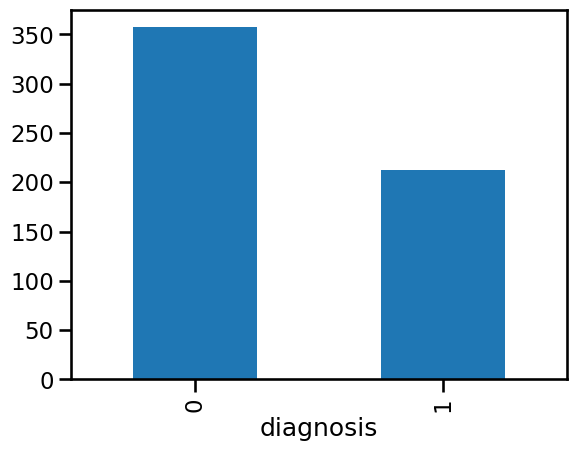

In [270]:
df["diagnosis"].value_counts().plot(kind='bar')

In [272]:
y=df["diagnosis"]
X=df.drop(["diagnosis"],axis=1)

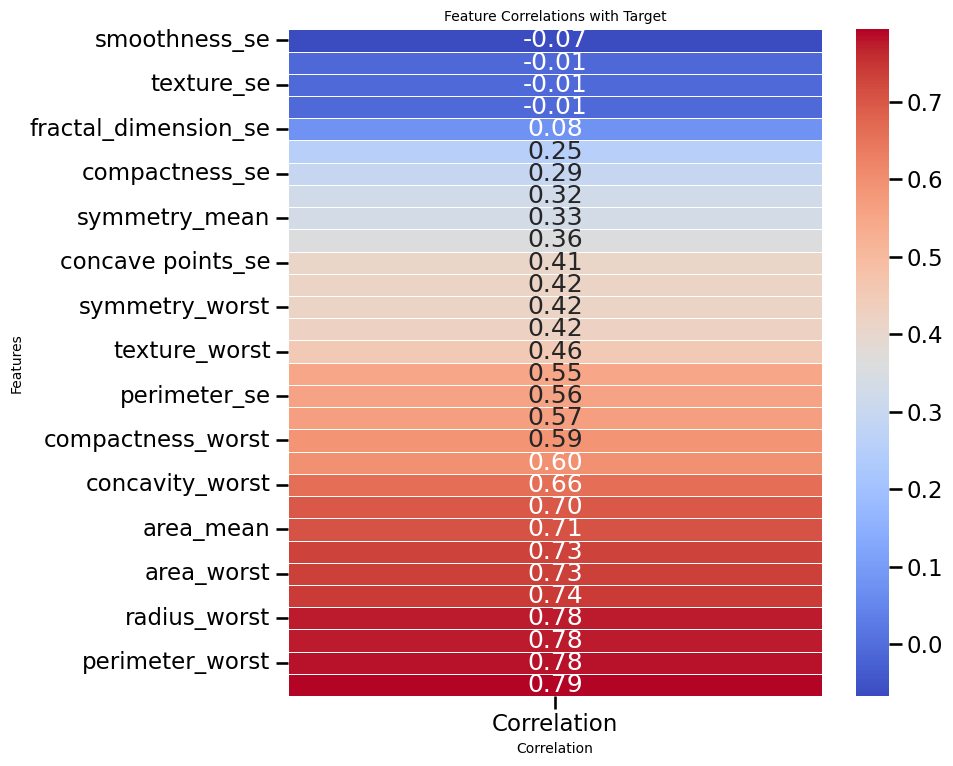

In [274]:
fields = list(X.columns[:])
correlations = df[fields].corrwith(y)
correlations.sort_values(inplace=True)
correlations_df = pd.DataFrame(correlations, columns=['Correlation'])

plt.figure(figsize=(10, 8))
sns.heatmap(correlations_df, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar=True)


plt.title('Feature Correlations with Target', fontsize=10)
plt.xlabel('Correlation', fontsize=10)
plt.ylabel('Features', fontsize=10)
plt.tight_layout()


plt.show()


In [278]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

### Bulding three dif models 
4. Model Training and Evaluation

Several classification models were trained on the dataset to compare their performance:

Logistic Regression: As a baseline model, logistic regression was applied. This linear model provides both classification and interpretability but may not capture complex relationships in the data.

Support Vector Machine (SVM): A more complex model that uses kernel tricks to capture non-linear relationships in the data. The RBF kernel was chosen for this analysis.

Decision Tree Classifier: A decision tree classifier was tested, and its performance was evaluated using cross-validation. The best depth for the tree was determined, and the model was trained accordingly.

Random Forest Classifier: An ensemble model of decision trees that improves accuracy by averaging multiple trees to reduce overfitting.

Each of the models was evaluated using accuracy, precision, recall, F1-score, and ROC-AUC. The following results were obtained:

Logistic Regression: The model achieved an accuracy of 0.97, with strong precision and recall values indicating its suitability for the task.
SVM: The SVM model achieved a comparable accuracy of 0.97 and showed a solid performance with an AUC of 0.98.
Decision Tree: With a depth of 2, the decision tree achieved an accuracy of 0.94, demonstrating that more complex trees may overfit the data.
Random Forest: The random forest classifier achieved an accuracy of 0.98, outperforming the other models in terms of accuracy

In [280]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.3, random_state=42)

In [282]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(X_train,y_train)
y_predicted=lr.predict(X_test)

In [284]:
y_predicted

array([0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0], dtype=int64)

In [286]:
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay, precision_recall_fscore_support, precision_score, recall_score
def evaluate_metrics(yt, yp):
    results_pos = {}
    results_pos['accuracy'] = accuracy_score(yt, yp)
    precision, recall, f_beta, _ = precision_recall_fscore_support(yt, yp)
    results_pos['recall'] = recall
    results_pos['precision'] = precision
    results_pos['f1score'] = f_beta
    return results_pos

In [288]:
ev =evaluate_metrics(y_test, y_predicted)
ev

{'accuracy': 0.9824561403508771,
 'recall': array([0.98148148, 0.98412698]),
 'precision': array([0.99065421, 0.96875   ]),
 'f1score': array([0.98604651, 0.97637795])}

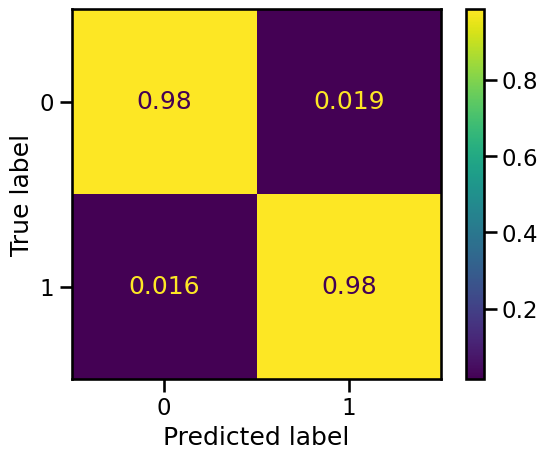

In [290]:
import matplotlib.pyplot as plt
cf = confusion_matrix(y_test, y_predicted, normalize='true')
sns.set_context('talk')
disp = ConfusionMatrixDisplay(confusion_matrix=cf,display_labels=lr.classes_)
disp.plot()
plt.show()

### It is essential to ensure that the two classes can be separated linearly to choose the best SVM model

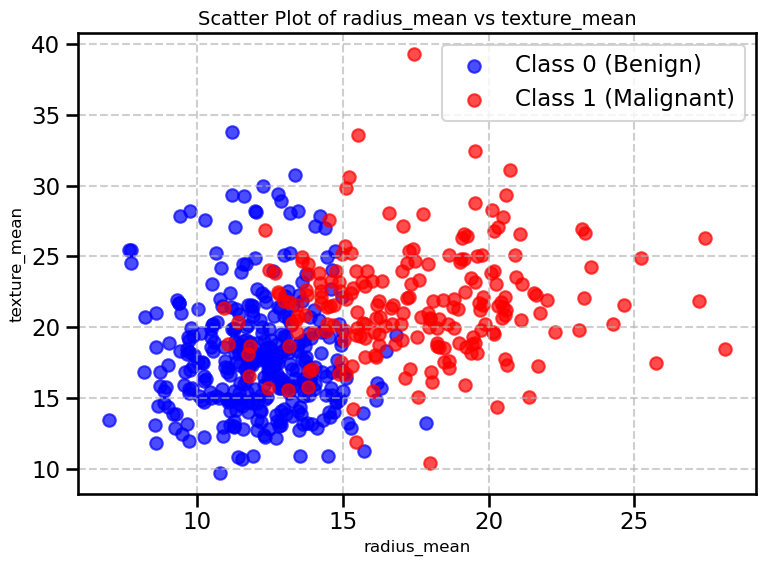

In [297]:



feature_1 = 'radius_mean'
feature_2 = 'texture_mean'


class_0 = df[df['diagnosis'] == 0] 
class_1 = df[df['diagnosis'] == 1]


plt.figure(figsize=(8, 6))
plt.scatter(class_0[feature_1], class_0[feature_2], color='blue', label='Class 0 (Benign)', alpha=0.7)
plt.scatter(class_1[feature_1], class_1[feature_2], color='red', label='Class 1 (Malignant)', alpha=0.7)


plt.title(f'Scatter Plot of {feature_1} vs {feature_2}', fontsize=14)
plt.xlabel(feature_1, fontsize=12)
plt.ylabel(feature_2, fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()


plt.show()


### As shown in the plot, there is an overlap between the two classes, making it impossible to separate them linearly. Therefore, we will use the RBF kernel for the SVM model.

#### building Support Vector Machine Alghorthim 

In [325]:
from sklearn.svm import SVC

svm_model = SVC(kernel='rbf', probability=True , random_state=42)
svm_model.fit(X_train,y_train)
yprime=svm_model.predict(X_test)

In [327]:
cp=classification_report(y_test,yprime)
print(cp)

              precision    recall  f1-score   support

           0       0.98      0.97      0.98       108
           1       0.95      0.97      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.97      0.97      0.97       171



#### building DecisionTreeClassifier and RandomForestClassifier

### Check for the optimal depth of the tree

In [329]:
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np


depth_range = np.arange(1, 11)  
cv_scores = []


for depth in depth_range:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(model, X_scaled, y, cv=5)  # 5-fold Cross-Validation
    cv_scores.append(scores.mean())


best_depth = depth_range[np.argmax(cv_scores)]
best_score = max(cv_scores)

print(f"Best Depth: {best_depth} with score : {best_score:.4f}")


Best Depth: 2 with score : 0.9280


In [353]:
#  DecisionTree
dt_model = DecisionTreeClassifier(max_depth=2, random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print(f"Decision Tree Accuracy: {dt_accuracy:.4f}")

# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Random Forest Accuracy: {rf_accuracy:.4f}")

Decision Tree Accuracy: 0.9298
Random Forest Accuracy: 0.9708



5. Model Comparison and Recommendation

After evaluating the models, the Random Forest Classifier emerged as the best model for this classification task. It provided the highest accuracy and the best AUC score, indicating it has the highest predictive power. Additionally, it benefited from being an ensemble method, reducing the overfitting risk seen in the decision tree model.

Logistic Regression: While a good baseline, it did not perform as well as the random forest model in terms of accuracy and AUC.
SVM: While the SVM showed good results, its non-linearity might make it harder to interpret compared to random forests.

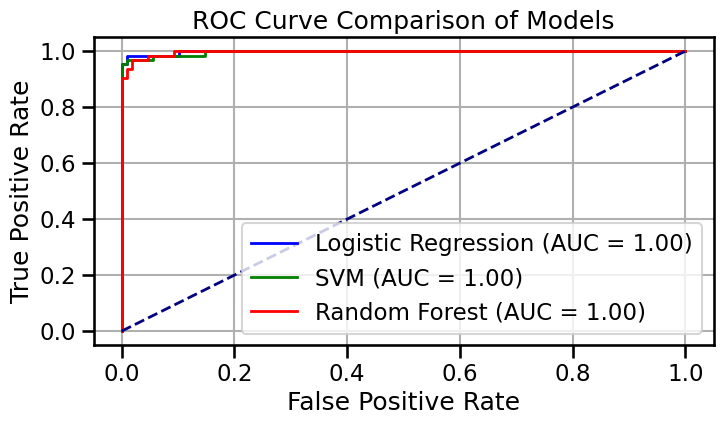

In [340]:

from sklearn.metrics import roc_curve, auc


y_prob_lr = lr.predict_proba(X_test)[:, 1]
y_prob_svm = svm_model.predict_proba(X_test)[:, 1]
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]


fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)

auc_lr = auc(fpr_lr, tpr_lr)
auc_svm = auc(fpr_svm, tpr_svm)
auc_rf = auc(fpr_rf, tpr_rf)

plt.figure(figsize=(8, 4))
plt.plot(fpr_lr, tpr_lr, color='blue', lw=2, label=f'Logistic Regression (AUC = {auc_lr:.2f})')
plt.plot(fpr_svm, tpr_svm, color='green', lw=2, label=f'SVM (AUC = {auc_svm:.2f})')
plt.plot(fpr_rf, tpr_rf, color='red', lw=2, label=f'Random Forest (AUC = {auc_rf:.2f})')


plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')


plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison of Models')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()



# 6. Key Findings and Insights

The mean radius and mean texture were found to be strong predictors of whether a tumor is benign or malignant. Visualizations like scatter plots show a clear distinction between malignant and benign tumors in these feature dimensions.
The decision tree model, although simpler, highlighted that tumor size and radius are crucial features for classification.
The Random Forest model provided a more reliable and robust classification by leveraging the power of multiple decision trees.
# 7. Suggestions for Future Work

Feature Engineering: Future analysis could benefit from additional features or interactions between existing features. For instance, combining radius and area into a single feature might yield better results.
Model Optimization: Further tuning of hyperparameters (such as the number of trees in the random forest) could improve the model’s performance.
Class Imbalance: If the dataset had an imbalance between benign and malignant cases, techniques like SMOTE (Synthetic Minority Over-sampling Technique) could be employed to balance the classes.
# 8. Conclusion

This analysis provides a comprehensive approach to breast cancer classification using several machine learning models. The Random Forest classifier stands out as the most effective for this dataset, combining high accuracy and interpretability. Future work could focus on further feature engineering and model refinement to improve the results